In [6]:
import tensorflow as tf
import os

In [7]:
import cv2
import imghdr

In [8]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [9]:
data_dir = 'data'

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [59]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 182 files belonging to 2 classes.


In [60]:
data_iter = data.as_numpy_iterator()

In [61]:
batch = data_iter.next()

In [62]:
#Images as numpy array
batch[0].shape

(32, 256, 256, 3)

In [63]:
batch[1]

#Class 1 = sad people
#Class 0 = happy people

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1])

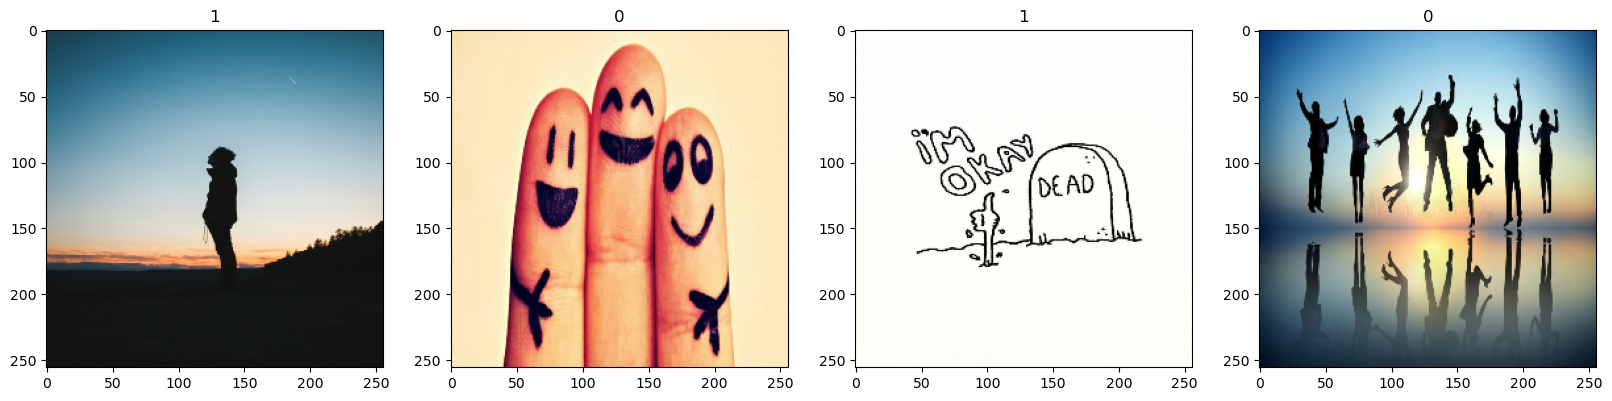

In [120]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][0:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [65]:
#Preprocess DATA

In [66]:
data = data.map(lambda x, y: (x/255, y))

In [67]:
batch = data.as_numpy_iterator().next()

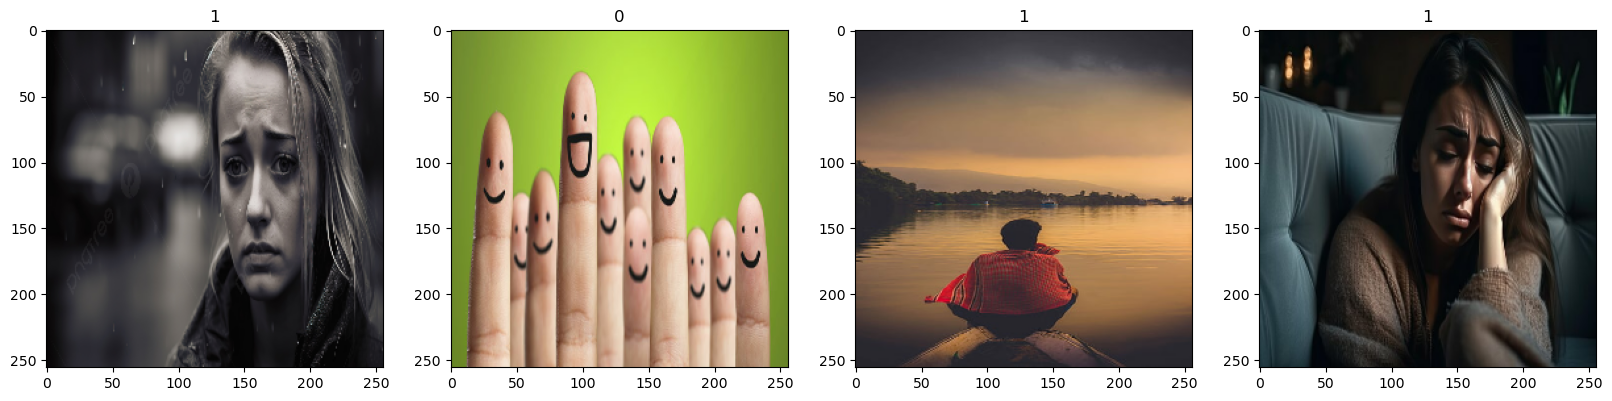

In [68]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][0:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [71]:
len(data)

6

In [72]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1

In [73]:
train_size + val_size + test_size

6

In [74]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [75]:
#Build the DL Model

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D

In [84]:
model = Sequential()

In [85]:
input_layer = Input(shape=(256, 256, 3))
model.add(input_layer)

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [86]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
logdir = 'logs'

In [89]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [90]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 364ms/step - accuracy: 0.5469 - loss: 0.8156 - val_accuracy: 0.3906 - val_loss: 0.7817
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - accuracy: 0.4648 - loss: 0.7313 - val_accuracy: 0.5469 - val_loss: 0.7298
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - accuracy: 0.5833 - loss: 0.6820 - val_accuracy: 0.5625 - val_loss: 0.6602
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - accuracy: 0.6445 - loss: 0.6080 - val_accuracy: 0.7031 - val_loss: 0.6099
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - accuracy: 0.7695 - loss: 0.5926 - val_accuracy: 0.7656 - val_loss: 0.5229
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 315ms/step - accuracy: 0.7904 - loss: 0.4949 - val_accuracy: 0.7812 - val_loss: 0.4994
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step - accuracy: 0.8099 - loss: 0.4545 - val_accuracy: 0.7969 - val_loss: 0.4098
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step - accuracy: 0.8880 - loss: 0.3329 - val_accuracy: 0.8906 - val_loss:

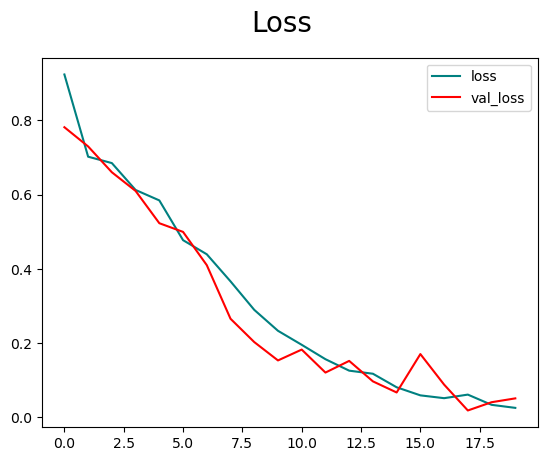

In [96]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

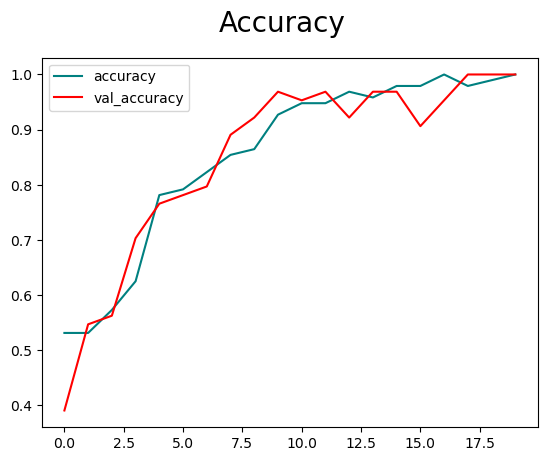

In [95]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [97]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [98]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [99]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


In [102]:
print(pre.result().numpy())

1.0


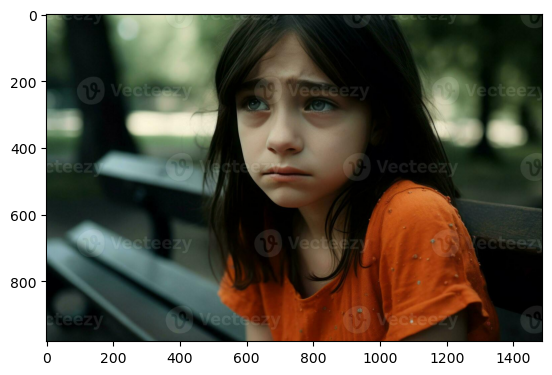

In [122]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

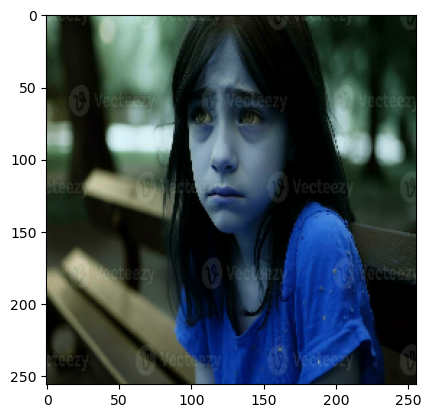

In [123]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [124]:
yhat = model.predict(np.expand_dims(resize / 255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [125]:
if yhat > 0.5:
    print('Sad Person')
else:
    print('Happy Person')

Sad Person
